<a href="https://colab.research.google.com/github/elonezra/deeplearningproject/blob/main/final_project_deep_learning_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authors: Avi and Elon 🤗

## Pre-Processing the data

In [1]:
# Importng necassary libraries
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.dummy import DummyRegressor

C:\Users\rahim\AppData\Local\Temp\ipykernel_19652\1178323852.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [39]:
df = pd.read_csv('BTC-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [40]:
# We don't need the "Adj Close" column because this column is the same as the "Close" column,
# we are going to check it before earasing to make sure our assumption is true.
print(df['Adj Close'].count(), df['Close'].count()) # In this line we can see that the number of lines in both of the columns is equal
print(len(df["Close"] == df["Adj Close"])) # and in this line we compared between those columns and get as result that all lines are equal
# thus, we can remove "Asj Close" column
df = df.drop(['Adj Close'], axis = 1)
df.head()

2713 2713
2713


,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


In [41]:
# here we add some new columns to our dataframe to check which column is more important to our model
df['Open_Close_Gap'] = (df['Open'] - df['Close'])
df['Open_Close_Mean'] = (df['Open'] + df['Close'])/2

In [42]:
# In the code below we will see that our dataframe uses an object column which is not good
# because we need a numeric dataframe so, we convert this column to int64 type
# by removing the '-' char
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2713 non-null   object 
 1   Open             2713 non-null   float64
 2   High             2713 non-null   float64
 3   Low              2713 non-null   float64
 4   Close            2713 non-null   float64
 5   Volume           2713 non-null   int64  
 6   Open_Close_Gap   2713 non-null   float64
 7   Open_Close_Mean  2713 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 169.7+ KB


In [43]:
df["Date"] = df["Date"].apply(lambda x: x.replace('-','')).apply(pd.to_numeric)

In [44]:
# Now, after we convert the "Date" column to numeric type, we can see the new data as request
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2713 non-null   int64  
 1   Open             2713 non-null   float64
 2   High             2713 non-null   float64
 3   Low              2713 non-null   float64
 4   Close            2713 non-null   float64
 5   Volume           2713 non-null   int64  
 6   Open_Close_Gap   2713 non-null   float64
 7   Open_Close_Mean  2713 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 169.7 KB


,Date,Open,High,Low,Close,Volume,Open_Close_Gap,Open_Close_Mean
0,20140917,465.864014,468.174011,452.421997,457.334015,21056800,8.529999,461.599015
1,20140918,456.859985,456.859985,413.104004,424.440002,34483200,32.419983,440.649993
2,20140919,424.102997,427.834991,384.532013,394.795990,37919700,29.307007,409.449494
3,20140920,394.673004,423.295990,389.882996,408.903992,36863600,-14.230988,401.788498
4,20140921,408.084991,412.425995,393.181000,398.821014,26580100,9.263977,403.453003


In [45]:
df['Year'] = df['Date'].astype(str).str.slice(0, 4)
df['Year']

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
2708    2022
2709    2022
2710    2022
2711    2022
2712    2022
Name: Year, Length: 2713, dtype: object

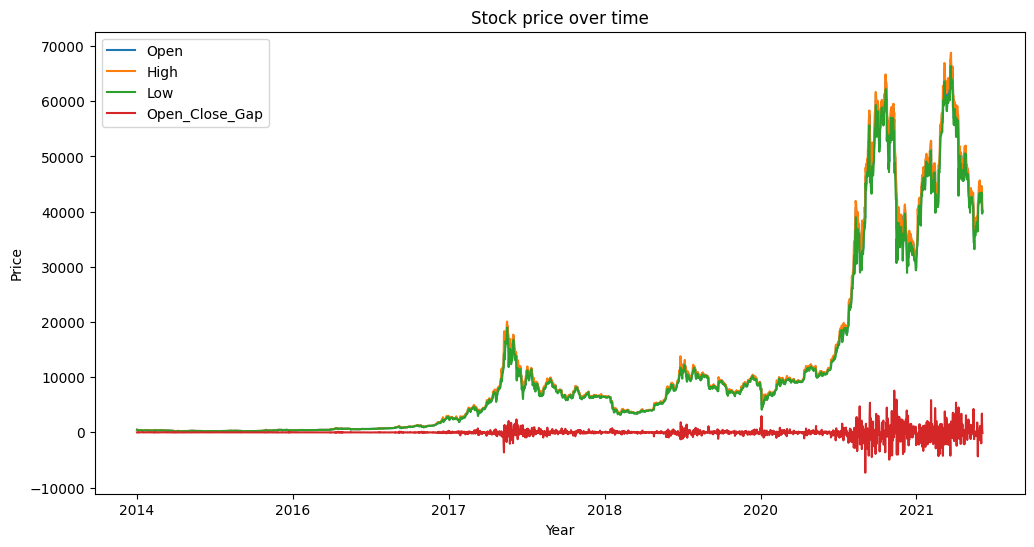

In [46]:
# Set 'Date' as the index
df.set_index('Year', inplace=True)

# Plot the data
df[['Open', 'High', 'Low', 'Open_Close_Gap']].plot(kind='line', figsize=(12,6))
plt.title('Stock price over time')
plt.ylabel('Price')
plt.show()




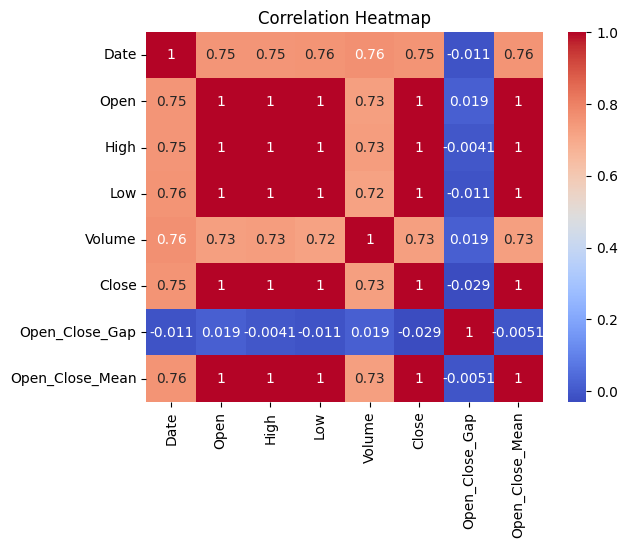

In [47]:
# Calculate the correlation matrix
df = df.reset_index()
corr = df[['Date', 'Open', 'High', 'Low', 'Volume', 'Close', 'Open_Close_Gap', 'Open_Close_Mean']].corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [48]:
df = df.drop(['Close', 'Open_Close_Mean', 'Year'], axis=1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2713 non-null   int64  
 1   Open            2713 non-null   float64
 2   High            2713 non-null   float64
 3   Low             2713 non-null   float64
 4   Volume          2713 non-null   int64  
 5   Open_Close_Gap  2713 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 127.3 KB


# Regularization

$\sigma = \sqrt(\mu_2) = \sqrt(1/n \sum(x_i - x')^2)$

$𝜇^{𝑙,𝑗}= \frac{1}{m} ∑_{𝑖=0}^{𝑚}{𝑧_𝑖^{𝑙,𝑗}}$ 

$𝜎^{𝑙,𝑗}=\sqrt{∑_{𝑖=0}^𝑚(𝑧_𝑖^{𝑙,𝑗}−𝜇^(𝑙,𝑗) )^2 }$

$\overline{𝑧_𝑖^{𝑙,𝑗}} ̂= \frac{𝑧_𝑖^{𝑙,𝑗}−𝜇^{𝑙,𝑗}}{𝜎^{𝑙,𝑗}+𝜖} $


In [188]:
X = df.drop(['Open_Close_Gap'], axis=1)
y = df['Open_Close_Gap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 2170
Testing set size: 543


# Normalization

In [189]:
def normalize_data(X_train, y_train, X_test, y_test):
    """
    This function normalizes the training and test data using the mean and variance of the training data.
    
    Parameters:
    X_train (DataFrame): The training data
    y_train (Series): The target values for the training data
    X_test (DataFrame): The test data
    y_test (Series): The target values for the test data
    
    Returns:
    DataFrame, Series, DataFrame, Series: The normalized training data, training target values, test data, and test target values
    """
    # Convert the dataframes to numpy arrays
    train_np = X_train.values
    test_np = X_test.values

    # Convert the series to numpy arrays
    y_train_np = y_train.values.reshape(-1, 1)
    y_test_np = y_test.values.reshape(-1, 1)

    # Create TensorFlow placeholders
    train_placeholder = tf.placeholder(tf.float32, shape=train_np.shape)
    test_placeholder = tf.placeholder(tf.float32, shape=test_np.shape)
    y_train_placeholder = tf.placeholder(tf.float32, shape=y_train_np.shape)
    y_test_placeholder = tf.placeholder(tf.float32, shape=y_test_np.shape)

    # Define the normalization function
    def normalize(x, mean, variance):
        return (x - mean) / tf.sqrt(variance)

    # Normalize the data
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        # Compute mean and variance from training data
        train_mean, train_variance = sess.run(tf.nn.moments(train_placeholder, axes=[0]), feed_dict={train_placeholder: train_np})
        
        # Normalize training data
        train_normalized = sess.run(normalize(train_placeholder, train_mean, train_variance), feed_dict={train_placeholder: train_np})
        
        # Normalize test data using mean and variance from training data
        test_normalized = sess.run(normalize(test_placeholder, train_mean, train_variance), feed_dict={test_placeholder: test_np})
        
        # Normalize y_train and y_test similarly
        y_train_mean, y_train_variance = sess.run(tf.nn.moments(y_train_placeholder, axes=[0]), feed_dict={y_train_placeholder: y_train_np})
        y_train_normalized = sess.run(normalize(y_train_placeholder, y_train_mean, y_train_variance), feed_dict={y_train_placeholder: y_train_np})
        y_test_normalized = sess.run(normalize(y_test_placeholder, y_train_mean, y_train_variance), feed_dict={y_test_placeholder: y_test_np})

    # Convert the normalized numpy arrays back to pandas dataframes
    X_train_normalized = pd.DataFrame(train_normalized, columns=X_train.columns)
    X_test_normalized = pd.DataFrame(test_normalized, columns=X_test.columns)

    # Convert the normalized numpy arrays back to pandas series
    y_train_normalized = pd.Series(y_train_normalized.flatten(), index=y_train.index)
    y_test_normalized = pd.Series(y_test_normalized.flatten(), index=y_test.index)

    return X_train_normalized, y_train_normalized, X_test_normalized, y_test_normalized


In [190]:
X_train_normalized, y_train_normalized, X_test_normalized, y_test_normalized = normalize_data(X_train, y_train, X_test, y_test)
print("Training set size:", len(X_train_normalized))
print("Testing set size:", len(X_test_normalized))


Training set size: 2170
Testing set size: 543


# Model training
Models that represented in the code: Linear regression, ANN - neural network model, dummy regressor model - to compare our model to that dummy model

In [191]:
def train_linear_regression(X_train, y_train, learning_rate=0.001, threshold=0.0001):
    """
    This function trains a linear regression model using TensorFlow.
    
    Parameters:
    X_train (DataFrame): The training data
    y_train (Series): The target values for the training data
    learning_rate (float): The learning rate for the optimizer
    threshold (float): The threshold for the change in loss
    
    Returns:
    sess (tf.Session): The TensorFlow session
    pred (Tensor): The prediction tensor
    x (tf.placeholder): The placeholder for the input data
    """
    features = X_train.shape[1]
    x = tf.placeholder(tf.float32, [None, features])
    y = tf.placeholder(tf.float32, [None, 1])
    W = tf.Variable(tf.zeros([features, 1]))
    b = tf.Variable(tf.zeros([1]))
    prev_loss = None
    pred = tf.matmul(x, W) + b
    loss = tf.reduce_mean(tf.square(pred - y))
    update = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    data_x = X_train.values
    data_y = y_train.values.reshape(-1, 1)
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    i = 0
    while True:
        i += 1
        _, val_loss = sess.run([update, loss], feed_dict={x: data_x, y: data_y})
        if prev_loss is not None and abs(prev_loss - val_loss) < threshold:
            print(f"Early stopping at epoch {i}")
            break
        prev_loss = val_loss
        if i % 10000 == 0:
            print('\nIteration:', i, '\n W:', sess.run(W), ' b:', sess.run(b), ' loss:', loss.eval(session=sess, feed_dict={x: data_x, y: data_y}))
    return sess, pred, x

We replaced this code:
```
for epoch in range(0, epochs):
        _, c = sess.run([optimizer, loss], feed_dict={x: data_x, y: data_y})
        if epoch % 1000 == 0:
            print("Epoch:", '%04d' % (epoch), "cost=", "{:.9f}".format(c))
```
with this code below:
```
prev_loss = None
i = 0
while True:
        i += 1
        _, val_loss = sess.run([optimizer, loss], feed_dict={x: data_x, y: data_y})
        if prev_loss is not None and abs(prev_loss - val_loss) < threshold:
            print(f"Early stopping at epoch {i}")
            break
        prev_loss = val_loss
        if i % 10000 == 0:
            print('\nIteration:', i, '\n W1:', sess.run(W1), ' b1:', sess.run(b1), '\n W2:', sess.run(W2), ' b2:', sess.run(b2), ' loss:', loss.eval(session=sess, feed_dict={x: data_x, y: data_y}))
```

which is the same approach as in the Linear Regression model.
We apply "Early stopping" for the ANN model such that when the difference between the current cost and the previous cost is less than the threshold, so we will stop to train the model and break the loop.

This technique saves us to use Trial and error because it finds the optimal values for W1, b1, W2, b2 because if we keep changing the bias and weights it has no much effect on the cost value.

In [192]:
def train_neural_network(X_train, y_train, learning_rate=0.001, threshold=0.0001):
    """
    This function trains a neural network with one hidden layer using TensorFlow.
    
    Parameters:
    X_train (DataFrame): The training data
    y_train (Series): The target values for the training data
    learning_rate (float): The learning rate for the optimizer
    epochs (int): The number of epochs to train the model
    
    Returns:
    sess (tf.Session): The TensorFlow session
    pred (Tensor): The prediction tensor
    x (tf.placeholder): The placeholder for the input data
    """
    features = X_train.shape[1]
    x = tf.placeholder(tf.float32, [None, features])
    y = tf.placeholder(tf.float32, [None, 1])
    W1 = tf.Variable(tf.random_normal([features, 10]))
    b1 = tf.Variable(tf.zeros([10]))
    W2 = tf.Variable(tf.random_normal([10, 1]))
    b2 = tf.Variable(tf.zeros([1]))
    hidden_layer = tf.nn.relu(tf.matmul(x, W1) + b1)
    pred = tf.matmul(hidden_layer, W2) + b2
    loss = tf.reduce_mean(tf.square(pred - y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    data_x = X_train.values
    data_y = y_train.values.reshape(-1, 1)
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    prev_cost = None
    i = 0
    while True:
        i += 1
        _, val_cost = sess.run([optimizer, loss], feed_dict={x: data_x, y: data_y})
        if prev_cost is not None and abs(prev_cost - val_cost) < threshold:
            print(f"Early stopping at epoch {i}")
            break
        prev_cost = val_cost
        if i % 10000 == 0:
            print('\nIteration:', i, '\n W1:', sess.run(W1), ' b1:', sess.run(b1), '\n W2:', sess.run(W2), ' b2:', sess.run(b2), ' loss:', loss.eval(session=sess, feed_dict={x: data_x, y: data_y}))
    return sess, pred, x

#### Create dummy model

In [193]:
def dummy_regressor(y_train):
    """
    This function creates a dummy regressor that predicts the mean value of the target variable.
    
    Parameters:
    X_train (DataFrame): The training data
    y_train (Series): The target values for the training data
    
    Returns:
    y_pred (ndarray): The predicted values
    """
    y_pred = [(np.random.uniform(-1,1)) for i in range(len(y_train))]
    return y_pred

In [194]:
dummy_pred = dummy_regressor(y_test_normalized)
print("y_dummy_pred:", dummy_pred)

y_dummy_pred: [-0.32888752578715685, -0.2112177204327197, -0.063105912791098, 0.8340847711014108, 0.47977529623306947, 0.9998236479192757, 0.9341224388194054, -0.6601473032386551, 0.16392473707048572, 0.5746730154802993, 0.18098650068941313, -0.11690759937729123, 0.37068111335119824, -0.6678529281625589, 0.9355728935349321, 0.30731133679969935, 0.02374986072767693, -0.3375542369352189, -0.7503353820752148, -0.6032778133373027, 0.3708738813672927, -0.884955072476242, -0.5868195739867621, -0.16152753355140792, -0.26389675318068084, -0.9050192113388222, 0.18455279601545738, 0.5548358628826702, -0.7947115865076242, -0.06574785427036733, -0.22683546602470317, 0.020224641982474978, 0.6464863069870819, 0.7385083892024016, 0.341286748545496, -0.06390913044624358, -0.6279560112649492, 0.6153404026946898, -0.7535562580741828, 0.37140824525601634, -0.6307579596104067, -0.05704017990634269, -0.7351819396715393, -0.9652541428725707, -0.057564070183926175, 0.3431301830706539, -0.9700528478598092, -0

In [195]:
# Train the models
print("Training Linear Regression model...")
sess_linear, pred_linear, x_linear = train_linear_regression(X_train_normalized, y_train_normalized, learning_rate=0.01, threshold=0.0000000000001)
print("Training Neural Network model...")
sess_nn, pred_nn, x_nn = train_neural_network(X_train_normalized, y_train_normalized, learning_rate=0.001, threshold=0.0000000000001) 

# Make predictions
y_pred_linear = sess_linear.run(pred_linear, feed_dict={x_linear: X_test_normalized.values})
y_pred_nn = sess_nn.run(pred_nn, feed_dict={x_nn: X_test_normalized.values})

# Calculate R-Squared score
r2_linear = r2_score(y_test_normalized, y_pred_linear)
r2_nn = r2_score(y_test_normalized, y_pred_nn)
r2_dummy = r2_score(y_test_normalized, dummy_pred)

mse_linear = mean_squared_error(y_test_normalized, y_pred_linear)
mse_nn = mean_squared_error(y_test_normalized, y_pred_nn)
mse_dummy = mean_squared_error(y_test_normalized, dummy_pred)

print(f"Linear Regression R-Squared score is: {r2_linear} and MSE on the test set is: {mse_linear}")
print(f"Neural Network R-Squared score is: {r2_nn} and MSE on the test set is: {mse_nn}")
print(f"Dummy Model R-Squared score is: {r2_dummy} and MSE on the test set is: {mse_dummy}")

Training Linear Regression model...



Iteration: 10000 
 W: [[-0.04676987]
 [ 3.4416952 ]
 [-1.056574  ]
 [-2.3524497 ]
 [ 0.03947638]]  b: [6.837758e-05]  loss: 0.8108598

Iteration: 20000 
 W: [[-2.1004800e-02]
 [ 6.4455943e+00]
 [-2.1231716e+00]
 [-4.2780738e+00]
 [-2.2372708e-03]]  b: [3.1800595e-05]  loss: 0.6718761

Iteration: 30000 
 W: [[-1.3473415e-03]
 [ 9.0789042e+00]
 [-3.1753907e+00]
 [-5.8504267e+00]
 [-3.3865441e-02]]  b: [3.8715384e-06]  loss: 0.5665248

Iteration: 40000 
 W: [[ 0.01339069]
 [11.393152  ]
 [-4.201478  ]
 [-7.1322    ]
 [-0.05739504]]  b: [-1.7083687e-05]  loss: 0.48585612

Iteration: 50000 
 W: [[ 0.02419347]
 [13.432026  ]
 [-5.1928873 ]
 [-8.175158  ]
 [-0.07443843]]  b: [-3.2459902e-05]  loss: 0.4234723

Iteration: 60000 
 W: [[ 0.03183892]
 [15.232176  ]
 [-6.143442  ]
 [-9.021725  ]
 [-0.08632819]]  b: [-4.3350814e-05]  loss: 0.3747793

Iteration: 70000 
 W: [[ 0.03699317]
 [16.82554   ]
 [-7.049427  ]
 [-9.707239  ]
 [-0.09412494]]  b: [-5.072836e-05]  loss: 0.33642322

Iteration: 80

# Comparison between models

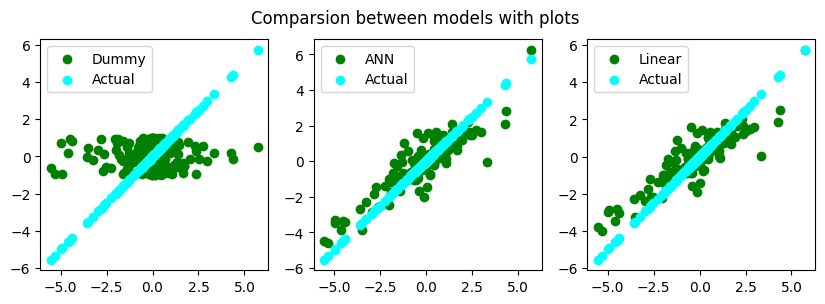

In [196]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
fig.suptitle('Comparsion between models with plots')

ax1.scatter(y_test_normalized, dummy_pred, color='green', label='Dummy')
ax1.scatter(y_test_normalized, y_test_normalized, color='cyan', label='Actual')
ax1.legend()

ax2.scatter(y_test_normalized, y_pred_nn, color='green', label='ANN')
ax2.scatter(y_test_normalized, y_test_normalized, color='cyan', label='Actual')
ax2.legend()

ax3.scatter(y_test_normalized, y_pred_linear, color='green', label='Linear')
ax3.scatter(y_test_normalized, y_test_normalized, color='cyan', label='Actual')
ax3.legend()
